## Install packages
- pandas
- matplotlib
- seaborn
- sklearn

## Import modules

In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

## Prepare data from train.csv

In [532]:
df_train_raw = pd.read_csv('train.csv', index_col='Id')
df_train = df_train_raw.copy()
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [533]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Check null values

In [534]:
df_train_nulls =df_train.isnull().sum()
df_train_nulls = df_train_nulls[df_train_nulls > 0]
df_train_nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Prepare function to remove or replace null values

In [535]:
def remove_or_replace_nan_values(df):
    df['MasVnrType'] = df['MasVnrType'].dropna
    df['MasVnrArea'] = df['MasVnrArea'].dropna
    df['BsmtQual'] = df['BsmtQual'].fillna('No')
    df['BsmtCond'] = df['BsmtCond'].fillna('No')
    df['BsmtExposure'] = df['BsmtExposure'].dropna
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')
    df['Electrical'] = df['Electrical'].dropna
    df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
    df['GarageType'] = df['GarageType'].fillna('No')
    df['GarageQual'] = df['GarageQual'].fillna('No')
    df['GarageCond'] = df['GarageCond'].fillna('No')
    df['PoolQC'] = df['PoolQC'].fillna('No')
    df['Fence'] = df['Fence'].fillna('No')
    df['MiscFeature'] = df['MiscFeature'].fillna('No')
    df['Alley'] = df['Alley'].fillna('No')
    df['GarageYrBlt'] = df['GarageYrBlt'].dropna
    df['GarageFinish'] = df['GarageFinish'].dropna
    df['LotFrontage'] = df['LotFrontage'].dropna
    return df



In [536]:
df_train = remove_or_replace_nan_values(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

Check correlation between columns

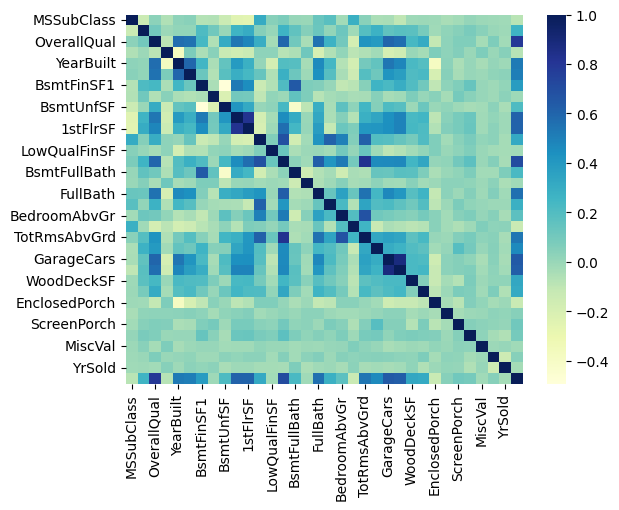

In [537]:
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.show()

In [538]:
df_train.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


Convert categorical variable into dummy/indicator variables

In [539]:
df_train_dummies = pd.get_dummies(df_train)
df_train_dummies.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


Choose columns with the biggest correlation to SalePrice column - need for price estimation

In [540]:
columns_for_estimation = []
for column_name, column_corr in df_train_dummies.corr()['SalePrice'].items():
    if (column_corr > 0.5 or column_corr < -0.5) and column_corr != 1: 
        print(column_name, round(column_corr,2))
        columns_for_estimation.append(column_name)


OverallQual 0.79
YearBuilt 0.52
YearRemodAdd 0.51
TotalBsmtSF 0.61
1stFlrSF 0.61
GrLivArea 0.71
FullBath 0.56
TotRmsAbvGrd 0.53
GarageCars 0.64
GarageArea 0.62
ExterQual_TA -0.59
BsmtQual_Ex 0.55
KitchenQual_Ex 0.5
KitchenQual_TA -0.52


Prepare function to create estimation regression random forest model 

In [541]:
def model_to_estimate_player_value(dataframe_train, columns_list):

    y_train = dataframe_train.pop("SalePrice")
    X_train = dataframe_train[columns_list]
    scaler_train = MinMaxScaler()
    scaler_train.fit(X_train)
    scaler_train.transform(X_train)
    
    rf = RandomForestRegressor()
    model = rf.fit(X_train, y_train.values)
    return model

## Prepare data from test.csv

In [542]:
df_test_raw = pd.read_csv('test.csv')
df_test = df_test_raw.copy()
print(f'Rows: {len(df_test)}')
df_test.head()

Rows: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Check null values in columns

In [543]:
df_test_nulls =df_test.isnull().sum()
df_test_nulls = df_test_nulls[df_test_nulls > 0]
df_test_nulls

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Use remove or replace funtion 

In [544]:
df_test = remove_or_replace_nan_values(df_test)
print(f'Rows: {len(df_test)}')

Rows: 1459


Count of rows is the same like before using function

In [545]:
df_test_nulls =df_test.isnull().sum()
df_test_nulls = df_test_nulls[df_test_nulls > 0]
df_test_nulls


MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [546]:
df_test[pd.isnull(df_test).any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,<bound method Series.dropna of 0 80.0\n...,10632,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,0,1,2010,COD,Normal
455,1916,30,NaN,<bound method Series.dropna of 0 80.0\n...,21780,Grvl,No,Reg,Lvl,NaN,...,0,0,No,No,No,0,3,2009,ConLD,Normal
485,1946,20,RL,<bound method Series.dropna of 0 80.0\n...,31220,Pave,No,IR1,Bnk,NaN,...,0,0,No,No,Shed,750,5,2008,WD,Normal
660,2121,20,RM,<bound method Series.dropna of 0 80.0\n...,5940,Pave,No,IR1,Lvl,AllPub,...,0,0,No,MnPrv,No,0,4,2008,ConLD,Abnorml
691,2152,30,RL,<bound method Series.dropna of 0 80.0\n...,19550,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,1,2008,WD,Normal
728,2189,20,RL,<bound method Series.dropna of 0 80.0\n...,47007,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,0,7,2008,WD,Normal
756,2217,20,NaN,<bound method Series.dropna of 0 80.0\n...,14584,Pave,No,Reg,Low,AllPub,...,0,0,No,No,No,0,2,2008,WD,Abnorml
790,2251,70,NaN,<bound method Series.dropna of 0 80.0\n...,56600,Pave,No,IR1,Low,AllPub,...,0,0,No,No,No,0,1,2008,WD,Normal
1013,2474,50,RM,<bound method Series.dropna of 0 80.0\n...,10320,Pave,Grvl,Reg,Lvl,AllPub,...,84,0,No,No,No,0,9,2007,COD,Abnorml
1029,2490,20,RL,<bound method Series.dropna of 0 80.0\n...,13770,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,0,10,2007,NaN,Normal


Convert categorical variable into dummy/indicator variables

In [547]:
df_test_dummies = pd.get_dummies(df_test)
df_test_dummies

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


Create estimation model by using function

In [548]:
model = model_to_estimate_player_value(df_train_dummies, columns_for_estimation)


Check rest of null values in test dataframe after converting categorical columns.

In [549]:
df_test_for_predict = df_test_dummies[columns_for_estimation]
df_test_nulls =df_test_for_predict.isnull().sum()
df_test_nulls = df_test_nulls[df_test_nulls > 0]
df_test_nulls

TotalBsmtSF    1
GarageCars     1
GarageArea     1
dtype: int64

Decided to fill null values with 0.

In [550]:
df_test_for_predict = df_test_for_predict.fillna(0)
print(f"Rows: {len(df_test_for_predict)}")

Rows: 1459


Count of rows is the same as before optimization

In [551]:
df_test_nulls =df_test_for_predict.isnull().sum()
df_test_nulls = df_test_nulls[df_test_nulls > 0]
df_test_nulls

Series([], dtype: int64)

No nulls values

## Make prices prediction based on test dataframe

In [552]:
prediction_price = model.predict(df_test_for_predict)

In [553]:
df_test_id = df_test["Id"]
df_test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

Create csv file with results.

In [554]:
df_results = pd.DataFrame({'Id': df_test_id, 'SalePrice': prediction_price})
df_results
df_results.to_csv('results.csv', index=False) 
